In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import sys
sys.path.append('../mchem_functions/')
import multivariate_functions as mvf
sys.path.append('../PCA_functions/')
import PCA_functions as pcf

# PCA

In [2]:
uvvis_spectra_dir =  '../../Data/SUVA/UV-vis/spectra'
files = os.listdir(uvvis_spectra_dir)
for f in files:
    
    spectrum_df = pd.read_csv(f'{uvvis_spectra_dir}/{f}',skiprows=1)
    if f == files[0]:
        wls = spectrum_df['Wavelength nm.'].to_numpy()
        intensities_array = spectrum_df['Abs.'].to_numpy()
    else:
        intensities_array = np.vstack((intensities_array,spectrum_df['Abs.'].to_numpy()))

In [3]:
(scores_values, variance_ratio,
 PCs, loadings) = pcf.get_pca_data(intensities_array,method='SNV',no_of_components=5)

In [4]:
SNVed = mvf.SNV(intensities_array)
eigvals, proportion_explained, U, F = mvf.PCA(SNVed,n_components=5)

In [5]:
for i in range(len(variance_ratio)):
    print(f'% error on the explained variance = {np.round(100*((proportion_explained[i]/variance_ratio[i])-1),3)}%')

% error on the explained variance = 0.0%
% error on the explained variance = 0.0%
% error on the explained variance = 0.0%
% error on the explained variance = 0.0%
% error on the explained variance = 0.001%


In [6]:
error_arr = np.zeros_like(scores_values)
for i in range(np.shape(scores_values)[0]):
    error_arr[i,:] = np.round( (100*( (F[i,:]/scores_values[i,:])-1 )) ,3)
pd.DataFrame(error_arr)

,0,1,2,3,4
0,-0.0,-0.000,0.000,-0.000,-0.218
1,-0.0,-0.000,-0.000,-0.000,-0.450
2,-0.0,0.000,-0.000,0.002,0.048
3,0.0,0.000,0.000,0.031,-1.815
4,0.0,0.000,0.000,-0.003,0.930
5,0.0,0.000,-0.000,0.001,-1.432
6,-0.0,0.000,-0.000,0.003,3.516
7,0.0,-0.000,0.002,-0.000,0.042
8,-0.0,0.000,0.000,0.002,-0.356
9,-0.0,-0.000,-0.000,-0.000,5.269


In [23]:
idx = np.where(np.abs(error_arr)==np.max(np.abs(error_arr)))
F[idx],scores_values[idx]

(array([0.00198752]), array([0.00231445]))

# RDA

In [7]:
Y = pd.read_csv('https://raw.githubusercontent.com/JoeyBernhardt/NumericalEcology/refs/heads/master/DoubsSpe.csv',index_col='Unnamed: 0').drop(index=8).to_numpy()
X = pd.read_csv('https://raw.githubusercontent.com/JoeyBernhardt/NumericalEcology/refs/heads/master/DoubsEnv.csv',index_col='Unnamed: 0').drop(index=8)

topography_df = X[['alt','pen','deb']]
# chemistry_df = X[['pH','dur','pho','nit','amm','oxy','dbo']]
chemistry_df = X[['pH','dur','pho','nit','amm','oxy','dbo']]
geography_df = X[['das']]

topography = topography_df.to_numpy()
chemistry = chemistry_df.to_numpy()
geography = geography_df.to_numpy()

# Hellinger Transform Y
row_sum = np.sum(Y,axis=1)
row_sum = np.reshape(row_sum,(len(row_sum),1))
Y = np.sqrt(Y/row_sum)

# mvf.standardise Xs
topography = mvf.standardise(topography)
chemistry = mvf.standardise(chemistry)
geography = mvf.standardise(geography)



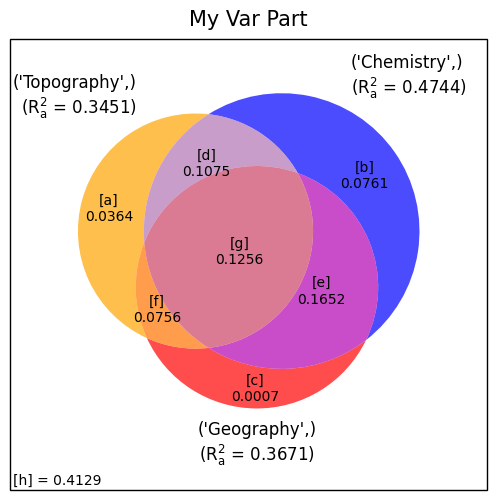

In [8]:
variables = [topography,chemistry,geography]
str_variables = ['Topography','Chemistry','Geography']
R2_list, venn_dict = mvf.varpart(Y,variables,X_labels=str_variables,title='My Var Part')

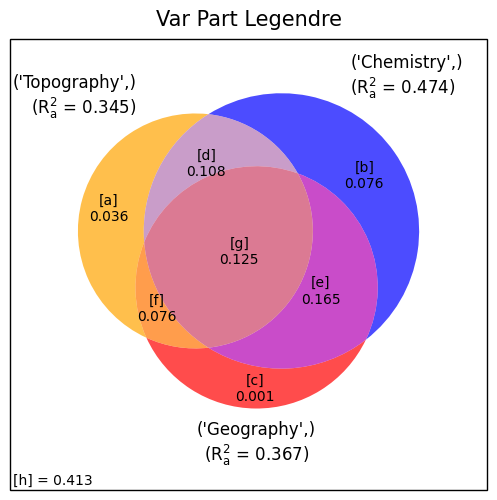

In [9]:
venn_dict_legendre = {
    ('Topography',): .345,
    ('Chemistry',): .474,
    ('Geography',): .367,
    ('Topography', 'Chemistry'): .586,
    ('Topography', 'Geography'): .511,
    ('Chemistry', 'Geography'): .551,
    ('Topography', 'Chemistry', 'Geography'): .587
}
mvf.varpart_venn3(venn_dict_legendre,title='Var Part Legendre')

In [10]:
for key in venn_dict_legendre:
    print(f'% error for {key} = {np.round(100*((venn_dict[key]/venn_dict_legendre[key])-1),3)}%')

% error for ('Topography',) = 0.029%
% error for ('Chemistry',) = 0.084%
% error for ('Geography',) = 0.027%
% error for ('Topography', 'Chemistry') = 0.068%
% error for ('Topography', 'Geography') = 0.0%
% error for ('Chemistry', 'Geography') = -0.054%
% error for ('Topography', 'Chemistry', 'Geography') = 0.017%
